# AirBnb Price Grouping

-------------------------------------------------------------------------------------------------------------------------------------------------

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv('listings.csv.gz')
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20250914034649,2025-09-16,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.87,4.78,4.78,NaN,f,2,1,1,0,0.30
1,15400,https://www.airbnb.com/rooms/15400,20250914034649,2025-09-16,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.84,4.93,4.74,NaN,f,1,1,0,0,0.51
2,17402,https://www.airbnb.com/rooms/17402,20250914034649,2025-09-16,city scrape,Very Central Modern 3-Bed/2 Bath By Oxford St W1,"You'll have a great time in this beautiful, cl...","Fitzrovia is a very desirable trendy, arty and...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,...,4.72,4.89,4.61,NaN,f,2,2,0,0,0.32
3,24328,https://www.airbnb.com/rooms/24328,20250914034649,2025-09-18,previous scrape,Battersea live/work artist house,"Artist house by SW Battersea Park, bright high...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/9194b40f-c627...,41759,...,4.93,4.60,4.65,NaN,f,1,1,0,0,0.53
4,36274,https://www.airbnb.com/rooms/36274,20250914034649,2025-09-15,city scrape,Bright 1 bedroom apt off brick lane in Shoreditch,*Update June '25- Pump Installed to improve wa...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,133271,...,4.46,4.85,4.54,NaN,t,2,2,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96866,1508894090797273412,https://www.airbnb.com/rooms/1508894090797273412,20250914034649,2025-09-16,city scrape,"Blueground | Finsbury, balcony, nr St. Paul's",Feel at home wherever you choose to live with ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,314162972,...,NaN,NaN,NaN,NaN,t,405,405,0,0,NaN
96867,1508900042872179492,https://www.airbnb.com/rooms/1508900042872179492,20250914034649,2025-09-15,city scrape,Self-Contained Studio in Heart of Tooting Broa...,Welcome to your perfect London stay - The Lond...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,718690455,...,5.00,5.00,5.00,NaN,f,1,1,0,0,2.00
96868,1508926597927944565,https://www.airbnb.com/rooms/1508926597927944565,20250914034649,2025-09-14,city scrape,One bedroom apartment Dagenham,"Modern 1-bedroom apartment in Kerwin House, Da...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,389056540,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
96869,1508962439633147670,https://www.airbnb.com/rooms/1508962439633147670,20250914034649,2025-09-15,city scrape,Short Stay,Take it easy at this unique and tranquil getaway.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,683246718,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


# Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96871 entries, 0 to 96870
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96871 non-null  int64  
 1   listing_url                                   96871 non-null  object 
 2   scrape_id                                     96871 non-null  int64  
 3   last_scraped                                  96871 non-null  object 
 4   source                                        96871 non-null  object 
 5   name                                          96871 non-null  object 
 6   description                                   94421 non-null  object 
 7   neighborhood_overview                         41208 non-null  object 
 8   picture_url                                   96865 non-null  object 
 9   host_id                                       96871 non-null 

# Observation
- We have to decide the objective first and then select the features which are similar and usefull for that objective. 
- Then when the grouping is done , and new data appears it will predict and give the answer in which cluster it lies.

# Object DF
- Objective is to group the clusters based on the pricing into 3 clusters Luxary , Mid-Range and Low Range.

In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
obj_df = df[['price' , 'accommodates' ,'bedrooms' , 'bathrooms' , 'beds' , 'latitude', 'longitude' , 'review_scores_rating' , 'number_of_reviews' , 'room_type' , 'property_type']]
obj_df

,price,accommodates,bedrooms,bathrooms,beds,latitude,longitude,review_scores_rating,number_of_reviews,room_type,property_type
0,$70.00,1,1.0,1.0,1.0,51.568610,-0.112700,4.85,55,Private room,Private room in rental unit
1,$149.00,2,1.0,1.0,1.0,51.487800,-0.168130,4.80,97,Entire home/apt,Entire rental unit
2,$411.00,6,3.0,2.0,3.0,51.521950,-0.140940,4.77,56,Entire home/apt,Entire rental unit
3,NaN,2,1.0,NaN,NaN,51.470720,-0.162660,4.90,95,Entire home/apt,Entire townhouse
4,$210.00,4,1.0,1.0,0.0,51.523220,-0.069790,4.53,15,Entire home/apt,Entire condo
...,...,...,...,...,...,...,...,...,...,...,...
96866,$298.00,2,2.0,2.0,0.0,51.526692,-0.097322,NaN,0,Entire home/apt,Entire rental unit
96867,$66.00,2,1.0,1.0,1.0,51.429503,-0.165492,5.00,2,Entire home/apt,Entire rental unit
96868,$350.00,4,1.0,1.0,1.0,51.529700,0.148890,NaN,0,Entire home/apt,Entire rental unit
96869,$40.00,1,1.0,1.0,1.0,51.514600,-0.063140,NaN,0,Private room,Private room in rental unit


In [6]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96871 entries, 0 to 96870
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 61963 non-null  object 
 1   accommodates          96871 non-null  int64  
 2   bedrooms              84096 non-null  float64
 3   bathrooms             62025 non-null  float64
 4   beds                  61951 non-null  float64
 5   latitude              96871 non-null  float64
 6   longitude             96871 non-null  float64
 7   review_scores_rating  72749 non-null  float64
 8   number_of_reviews     96871 non-null  int64  
 9   room_type             96871 non-null  object 
 10  property_type         96871 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 8.1+ MB


# Checking Null Values

In [7]:
obj_df.isnull().sum()

price                   34908
accommodates                0
bedrooms                12775
bathrooms               34846
beds                    34920
latitude                    0
longitude                   0
review_scores_rating    24122
number_of_reviews           0
room_type                   0
property_type               0
dtype: int64

# Checking Duplicates

In [8]:
obj_df.duplicated().sum()
# 160 records are duplicate so we will drop them

np.int64(160)

# Dropping the Duplicates

In [9]:
obj_df.drop_duplicates(keep='first',inplace=True)
obj_df.duplicated().sum()

np.int64(0)

# Object and Numeric Features

In [10]:
num_features = [features for features in obj_df.columns if obj_df[features].dtypes != 'O']
cat_features = [features for features in obj_df.columns if obj_df[features].dtypes == 'O']
print(num_features , len(num_features))
print(cat_features , len(cat_features))

['accommodates', 'bedrooms', 'bathrooms', 'beds', 'latitude', 'longitude', 'review_scores_rating', 'number_of_reviews'] 8
['price', 'room_type', 'property_type'] 3


# Univariate Analysis for the Numeric Feature

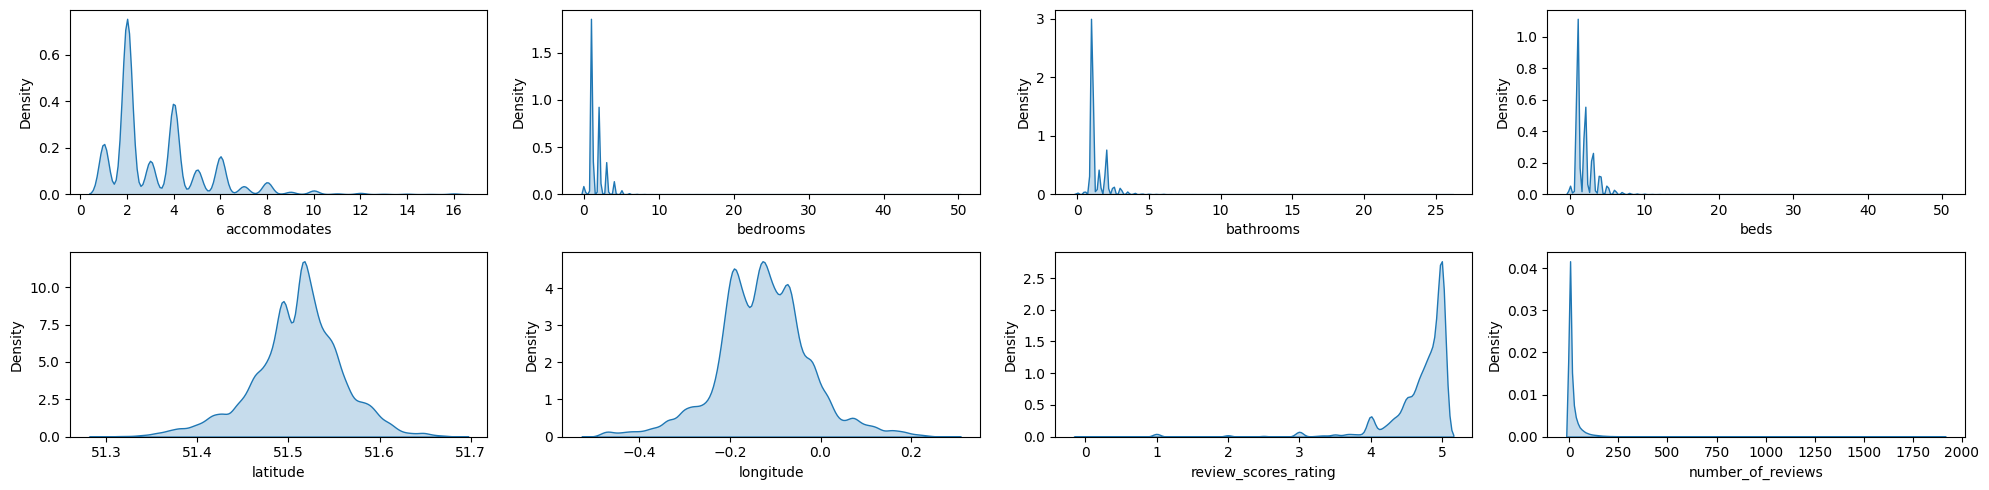

In [11]:
plt.figure(figsize=(20,5))
for i in range(len(num_features)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(obj_df[num_features[i]],shade = True)
    plt.xlabel(num_features[i])
    
plt.tight_layout()
plt.show()

# Box Plot

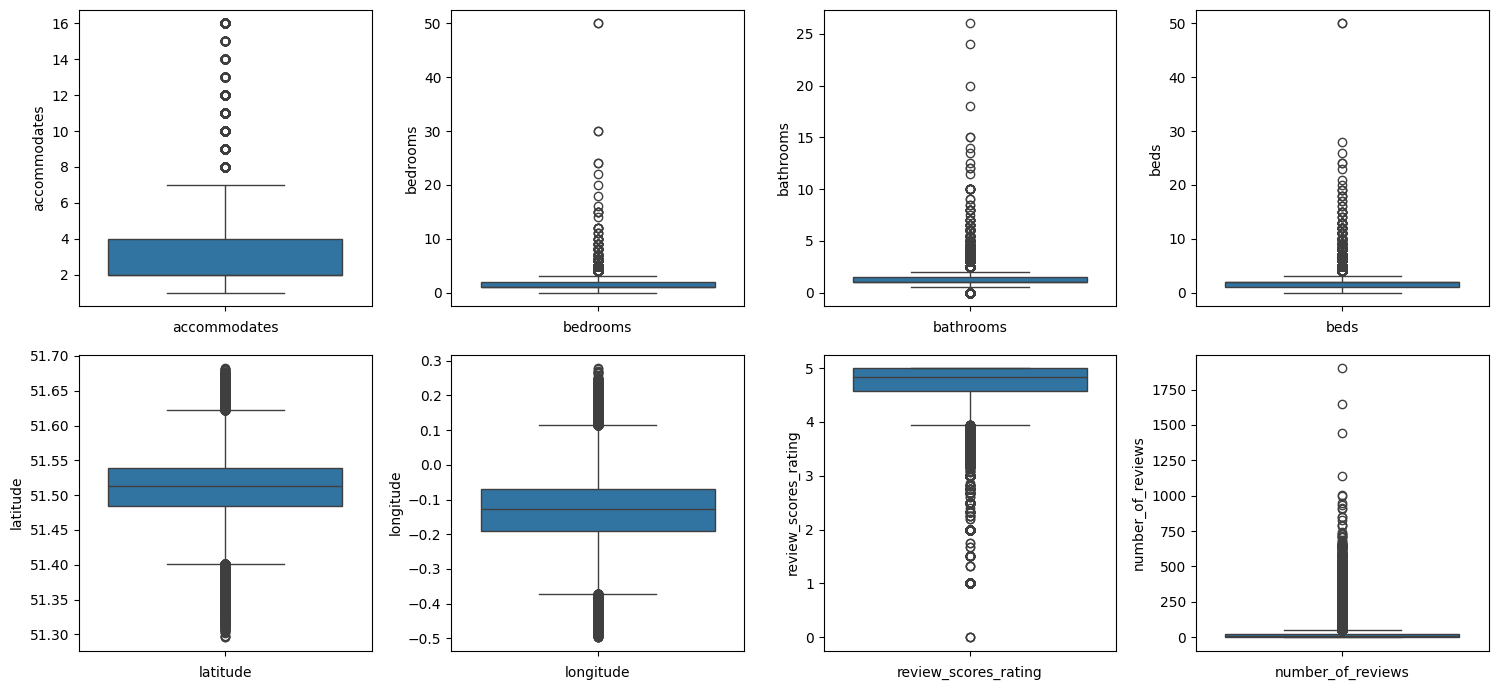

In [12]:
plt.figure(figsize=(15,7))
for i in range(len(num_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(obj_df[num_features[i]])
    plt.xlabel(num_features[i])
    
plt.tight_layout()
plt.show()

# Unique Value for the obj_df

In [13]:
for cols in num_features:
    print(f"{cols} = {obj_df[cols].unique()}")

accommodates = [ 1  2  6  4  5  7  3  8 10 13  9 12 15 16 11 14]
bedrooms = [ 1.  3.  4. nan  2.  0.  5.  6.  8.  7. 14.  9. 10. 11. 12. 15. 50. 24.
 20. 18. 30. 22. 16.]
bathrooms = [ 1.   2.   nan  1.5  0.   2.5  4.   3.   0.5  3.5  4.5  5.   6.5  5.5
  7.5 10.   6.  12.   8.5 12.5  9.   7.   8.  14.  26.  18.  11.5 15.
 20.  24.  13.5]
beds = [ 1.  3. nan  0.  4.  2.  5.  8.  6. 10.  7. 12. 13.  9. 11. 23. 17. 21.
 14. 15. 18. 19. 16. 24. 50. 28. 20. 26.]
latitude = [51.56861    51.4878     51.52195    ... 51.5266923  51.4295027
 51.51732504]
longitude = [-0.1127    -0.16813   -0.14094   ... -0.0973218 -0.1654924  0.14889  ]
review_scores_rating = [4.85 4.8  4.77 4.9  4.53 4.87 4.83 4.97 4.5  4.7  4.89  nan 4.74 4.88
 5.   4.82 4.81 4.73 4.71 4.95 4.57 4.63 4.69 4.54 4.46 4.55 4.92 4.68
 4.79 4.86 4.65 4.6  4.58 4.75 4.91 4.84 4.24 4.98 4.78 4.64 4.41 4.42
 4.52 4.39 4.66 4.67 4.   4.14 4.13 4.93 4.56 4.49 4.96 4.33 4.76 4.72
 4.43 4.48 4.59 4.94 4.61 4.99 4.07 4.44 4.25 4.47 4.28 4

# Observation
- We will do median imputation in the bedrooms bathrooms and beds and review_score

# Simple Imputer

In [14]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan , strategy='median')
obj_df[num_features] = (impute.fit_transform(obj_df[num_features]).astype(float))
obj_df.isnull().sum()

# missing_values --> we have to give the format of missing value
# strategy --> It is the parameter which is used to fill the particular colums with which kind of imputations


price                   34847
accommodates                0
bedrooms                    0
bathrooms                   0
beds                        0
latitude                    0
longitude                   0
review_scores_rating        0
number_of_reviews           0
room_type                   0
property_type               0
dtype: int64

# Price Column

In [15]:
obj_df['price'].unique()

array(['$70.00', '$149.00', '$411.00', ..., '$10,028.00', '$10,020.00',
       '$3,509.00'], shape=(1351,), dtype=object)

# Typecasting and formatting

In [16]:
obj_df['price'] = obj_df['price'].str.split('$').str[1]
obj_df['price'].unique()

array(['70.00', '149.00', '411.00', ..., '10,028.00', '10,020.00',
       '3,509.00'], shape=(1351,), dtype=object)

# Removing Comma

In [17]:
# obj_df['price'] = obj_df['price'].str.split(',').str.join('').astype(float)
obj_df['price'] = obj_df['price'].str.replace(',','').astype(float)
obj_df['price'].unique()


array([   70.,   149.,   411., ..., 10028., 10020.,  3509.], shape=(1351,))

# Imputing the Price column with median value

In [18]:
obj_df['price'] = obj_df['price'].fillna(obj_df['price'].median())

In [19]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96711 entries, 0 to 96870
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 96711 non-null  float64
 1   accommodates          96711 non-null  float64
 2   bedrooms              96711 non-null  float64
 3   bathrooms             96711 non-null  float64
 4   beds                  96711 non-null  float64
 5   latitude              96711 non-null  float64
 6   longitude             96711 non-null  float64
 7   review_scores_rating  96711 non-null  float64
 8   number_of_reviews     96711 non-null  float64
 9   room_type             96711 non-null  object 
 10  property_type         96711 non-null  object 
dtypes: float64(9), object(2)
memory usage: 8.9+ MB


# Observation
- We will do one hot Encoding for the room type column

In [20]:
obj_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

- We will do the frequency based encoding on the property_type

In [21]:
obj_df['property_type'].unique()

array(['Private room in rental unit', 'Entire rental unit',
       'Entire townhouse', 'Entire condo', 'Private room in home',
       'Private room in townhouse', 'Private room in condo',
       'Room in serviced apartment', 'Room in aparthotel',
       'Entire serviced apartment', 'Private room in loft', 'Entire home',
       'Entire guest suite', 'Houseboat',
       'Private room in serviced apartment',
       'Private room in bed and breakfast', 'Private room in bungalow',
       'Private room in guesthouse', 'Private room in guest suite',
       'Entire place', 'Entire loft', 'Entire cabin',
       'Entire vacation home', 'Private room', 'Private room in yurt',
       'Boat', 'Private room in villa', 'Shared room in condo',
       'Entire cottage', 'Private room in tiny home',
       'Private room in cottage', 'Tiny home',
       'Private room in houseboat', 'Room in hotel', 'Entire guesthouse',
       'Private room in vacation home', 'Room in bed and breakfast',
       'Room in bo

# Frequency Encoding

In [22]:
obj_df['property_type'] = obj_df['property_type'].map(obj_df['property_type'].value_counts(normalize=True))
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96711 entries, 0 to 96870
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 96711 non-null  float64
 1   accommodates          96711 non-null  float64
 2   bedrooms              96711 non-null  float64
 3   bathrooms             96711 non-null  float64
 4   beds                  96711 non-null  float64
 5   latitude              96711 non-null  float64
 6   longitude             96711 non-null  float64
 7   review_scores_rating  96711 non-null  float64
 8   number_of_reviews     96711 non-null  float64
 9   room_type             96711 non-null  object 
 10  property_type         96711 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.9+ MB


In [23]:
obj_df

,price,accommodates,bedrooms,bathrooms,beds,latitude,longitude,review_scores_rating,number_of_reviews,room_type,property_type
0,70.0,1.0,1.0,1.0,1.0,51.568610,-0.112700,4.85,55.0,Private room,0.149125
1,149.0,2.0,1.0,1.0,1.0,51.487800,-0.168130,4.80,97.0,Entire home/apt,0.425846
2,411.0,6.0,3.0,2.0,3.0,51.521950,-0.140940,4.77,56.0,Entire home/apt,0.425846
3,135.0,2.0,1.0,1.0,2.0,51.470720,-0.162660,4.90,95.0,Entire home/apt,0.010940
4,210.0,4.0,1.0,1.0,0.0,51.523220,-0.069790,4.53,15.0,Entire home/apt,0.085254
...,...,...,...,...,...,...,...,...,...,...,...
96866,298.0,2.0,2.0,2.0,0.0,51.526692,-0.097322,4.83,0.0,Entire home/apt,0.425846
96867,66.0,2.0,1.0,1.0,1.0,51.429503,-0.165492,5.00,2.0,Entire home/apt,0.425846
96868,350.0,4.0,1.0,1.0,1.0,51.529700,0.148890,4.83,0.0,Entire home/apt,0.425846
96869,40.0,1.0,1.0,1.0,1.0,51.514600,-0.063140,4.83,0.0,Private room,0.149125


# BoxPlot

<Axes: >

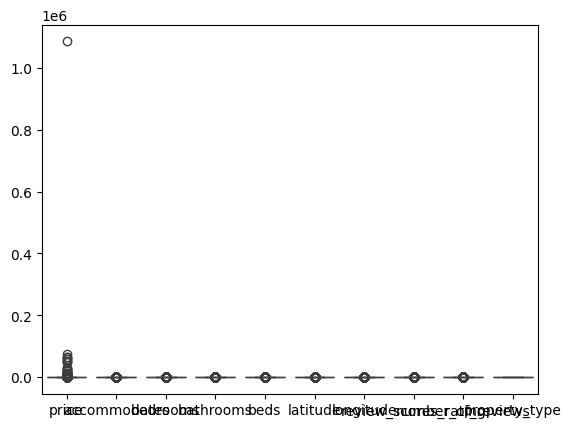

In [24]:
sns.boxplot(obj_df)

In [25]:
cols = obj_df.columns

In [26]:
sum_df = obj_df.copy()

# Column Transforming

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder

scale_features = obj_df.select_dtypes(exclude='object').columns
scale_features

ohe = OneHotEncoder(drop = 'first' , sparse_output = False)
scaler = StandardScaler()

preprocessor = ColumnTransformer([('ohe',ohe,['room_type']) , ('ss',scaler,scale_features)],remainder='passthrough')
obj_df = preprocessor.fit_transform(obj_df)
obj_df

array([[ 0.        ,  1.        ,  0.        , ...,  0.29850525,
         0.66082143, -0.5212586 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.1830772 ,
         1.4941143 ,  1.13319701],
       [ 0.        ,  0.        ,  0.        , ...,  0.11382036,
         0.68066174,  1.13319701],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.25233403,
        -0.43039541,  1.13319701],
       [ 0.        ,  1.        ,  0.        , ...,  0.25233403,
        -0.43039541, -0.5212586 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.25233403,
        -0.43039541, -0.5212586 ]], shape=(96711, 13))

In [28]:
# pd.DataFrame(obj_df)

In [29]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop = 'first', sparse_output = False)
# encodings = ohe.fit_transform(obj_df[['room_type']])
# encoding_df = pd.DataFrame(encodings , columns = ohe.get_feature_names_out(),index = obj_df.index)
# obj_df = pd.concat([obj_df,encoding_df],axis = 1)
# obj_df.drop('room_type',axis = 1 , inplace = True)


# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# obj_df = scaler.fit_transform(obj_df)

# obj_df

# PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(obj_df)
pca_df

array([[-1.61595256, -0.71868795],
       [-1.17965498,  0.21593032],
       [ 2.4931498 ,  0.35882104],
       ...,
       [-0.64338763,  1.2097278 ],
       [-1.54742888, -0.38441528],
       [-0.77788472, -0.24497522]], shape=(96711, 2))

# Variances of PCA

In [31]:
pca.explained_variance_

array([2.78827538, 1.19186737])

# Plotting the PCA

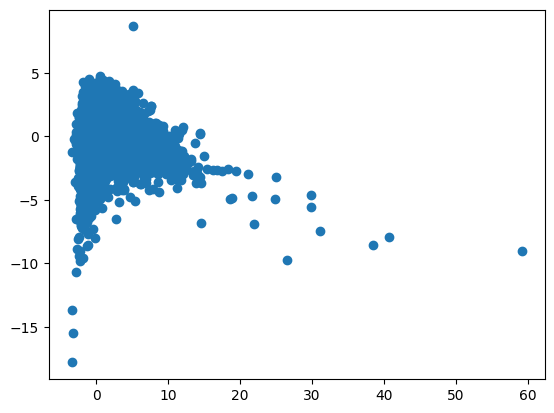

In [32]:
plt.scatter(pca_df[:,0],pca_df[:,1])

In [33]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(
#     pca_df[:, 0],   
#     pca_df[:, 1],   
#     pca_df[:, 2],   
#     s=30
# )

# ax.set_xlabel('Feature 1')
# ax.set_ylabel('Feature 2')
# ax.set_zlabel('Feature 3')

# plt.show()


# Kmeans

In [34]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,15):
    km = KMeans(n_clusters = k , init="k-means++")
    km.fit(obj_df)
    wcss.append(km.inertia_)

wcss


[989333.3120327571,
 823896.6594440932,
 730066.4627674919,
 680498.3224665909,
 641903.4615665373,
 559592.35542233,
 497314.6049653698,
 488699.0032205627,
 439752.01969651214,
 424467.2643345098,
 416456.2232905536,
 392549.3414043275,
 382453.39209313144,
 370365.99598275713]

# Elbow Curve and Knee Loacter Scoring

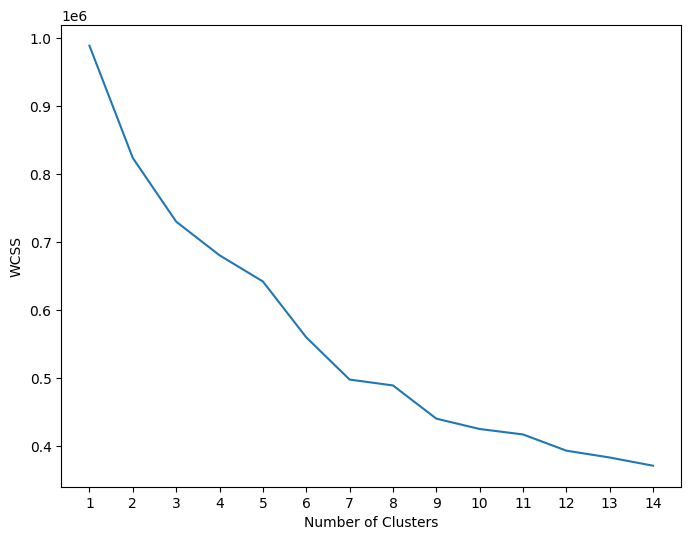

np.int64(9)

In [35]:
plt.figure(figsize = (8,6))
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

from kneed import KneeLocator
kl = KneeLocator(range(1,15),wcss,curve = 'convex',direction = 'decreasing')
kl.elbow


# Elbow curve for PCA

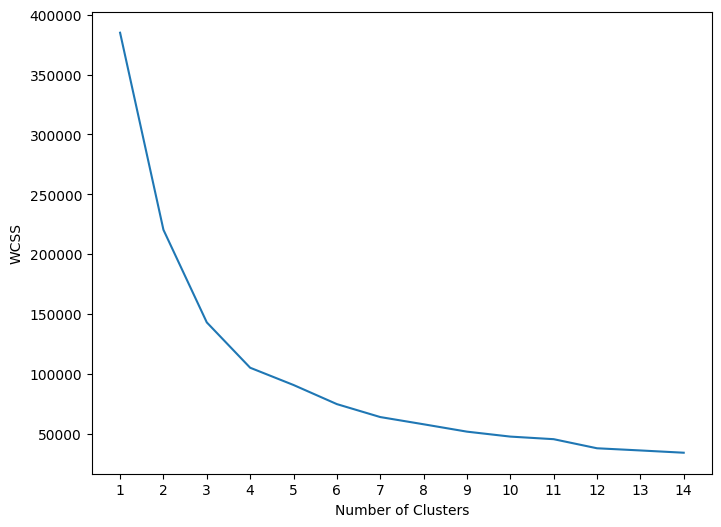

np.int64(4)

In [36]:
wcss_pca = []
for k in range(1,15):
    km = KMeans(n_clusters = k , init="k-means++")
    km.fit(pca_df)
    wcss_pca.append(km.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1,15),wcss_pca)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

kl_pca = KneeLocator(range(1,15),wcss_pca,curve = 'convex',direction = 'decreasing')
kl_pca.elbow
    

# Prediction

In [37]:
km = KMeans(n_clusters=3 , init = 'k-means++')
Y_pred = km.fit_predict(pca_df)
Y_pred

array([0, 0, 1, ..., 2, 0, 0], shape=(96711,), dtype=int32)

# Plotting the clusters

In [38]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(
#     pca_df[:, 0],   
#     pca_df[:, 1],   
#     pca_df[:, 2],   
#     s=30,
#     c = Y_pred
# )

# ax.set_xlabel('Feature 1')
# ax.set_ylabel('Feature 2')
# ax.set_zlabel('Feature 3')

# plt.show()

<Axes: >

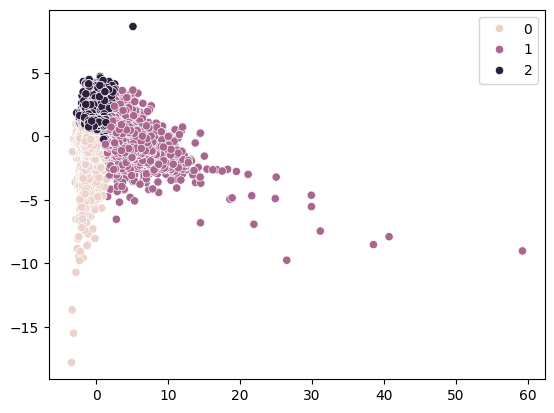

In [39]:
sns.scatterplot(x = pca_df[:,0], y = pca_df[:,1] , hue = Y_pred)

In [ ]:
sum_df['Cluster'] = Y_pred
sum_df['Cluster'].value_counts()

Cluster
0    45267
2    37951
1    13493
Name: count, dtype: int64

In [44]:
summary = sum_df.groupby('Cluster')[[
    'price',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'number_of_reviews',
    'review_scores_rating'
]].agg(['mean'])

summary

,price,accommodates,bedrooms,bathrooms,number_of_reviews,review_scores_rating
,mean,mean,mean,mean,mean,mean
Cluster,,,,,,
0,133.754479,2.203945,1.132238,1.100205,31.062518,4.788766
1,345.151560,6.944712,3.234196,2.020084,17.393315,4.745604
2,215.955706,3.382968,1.393086,1.094359,12.045928,4.630649


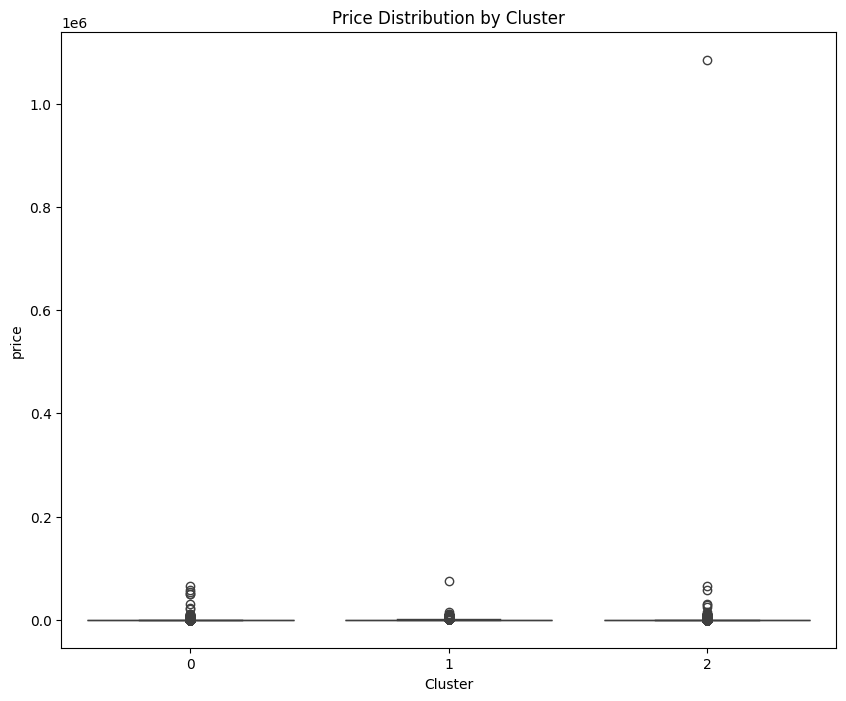

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=sum_df, x='Cluster', y='price')
plt.title("Price Distribution by Cluster")
plt.show()


In [48]:
import pickle

pickle.dump(km,open('Airbnb.pkl','wb'))